In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [29]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'size': 22}

matplotlib.rc('font', **font)

import numpy as np
import pandas as pd

import scipy
import scipy.stats
import seaborn as sns

import sklearn.datasets

import mrob

<AxesSubplot:>

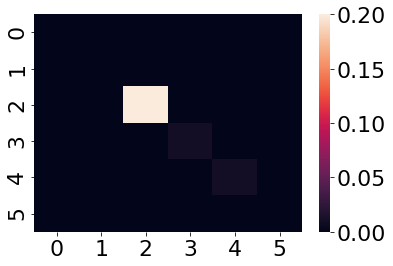

In [30]:
sigma = sklearn.datasets.make_spd_matrix(6)*1e-5
sigma = np.eye(6)
sigma[0,0] = 1e-10
sigma[1,1] = 1e-10
sigma[2,2] = 1e-1
sigma[3,3] = 1e-4
sigma[4,4] = 1e-4
sigma[5,5] = 1e-10

sigma = np.diag([1e-10,1e-10,0.2,1e-2,1e-2,1e-10])

# sigma = sklearn.datasets.make_spd_matrix(6)*1e-5 

mu = np.array([0,0,0,0,0,0])
sns.heatmap(sigma)

In [31]:
n = scipy.stats.multivariate_normal(mu,sigma)

In [32]:
n.rvs()

array([-5.76933250e-06,  3.61449139e-06,  3.91741471e-01, -1.50040025e-02,
        1.58870086e-01,  1.58623732e-05])

<AxesSubplot:>

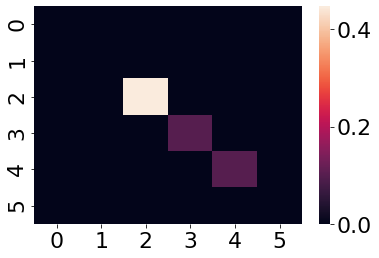

In [33]:
A = np.linalg.cholesky(sigma)
sns.heatmap(A)

In [34]:
def rotate(l, n):
    return l[-n:] + l[:-n]

# X & Y

In [35]:
points = []
points.append([0,0,0,1,0,0])
points.append([0,0,0,-1,0,0])
points.append([0,0,0,0,1,0])
points.append([0,0,0,0,-1,0])


labels = ['+x','-x','+y','-y']
# x = [1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)
    
# x = [-1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)

N = 100
for i in range(N):
    points.append([0,0,0,1*np.cos(2*np.pi/N*i), 1*np.sin(2*np.pi/N*i),0])

points = np.array(points)

In [36]:
points_img = np.dot(A,points.transpose()).transpose()

In [37]:
propagated = []


for i in range(len(points_img)):
    tmp = mrob.geometry.SE3([0,0,0.1,1,0,0])
    tmp.update_lhs(points_img[i])
    propagated.append(tmp)

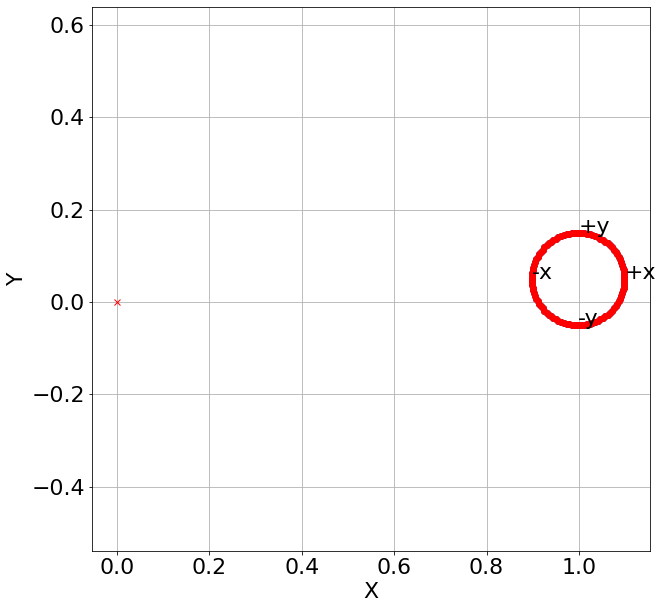

In [38]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,0],poses[:,1])

for i in range(len(points_img)):
    plt.plot(poses[i,0],poses[i,1],'o', color='red')
    

for i in range(len(labels)):
    plt.annotate(labels[i],(poses[i,0],poses[i,1]))
    
plt.plot(0,0,'x',color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis('equal')
plt.show()

# yaw & x

In [39]:
N = 100
K = 3

points = []
points.append([0,0,K,0,0,0])
points.append([0,0,-K,0,0,0])
points.append([0,0,0,K,0,0])
points.append([0,0,0,-K,0,0])


labels = ['+yaw','-yaw','+x','-x']
# x = [1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)
    
# x = [-1,0,0,0,0,0]

# for _ in range(6):
#     points.append(x)
#     x = rotate(x,1)


for i in range(N):
    points.append([0,0,K*np.cos(2*np.pi/N*i), K*np.sin(2*np.pi/N*i),0,0])

points = np.array(points)

In [40]:
points_img = np.dot(A,points.transpose()).transpose()

In [41]:
propagated = []


for i in range(len(points_img)):
    tmp = mrob.geometry.SE3([0,0,0,1,1,0])
    tmp.update_lhs(points_img[i])
    propagated.append(tmp)

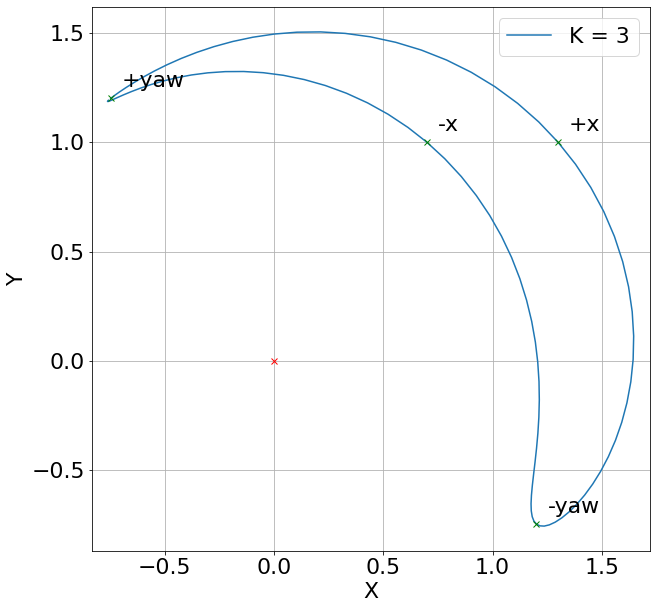

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

# plt.scatter(poses[:,0],poses[:,1])

plt.plot(poses[4:,0],poses[4:,1], label="K = {}".format(K))

for i in range(len(points_img)):
    continue
    plt.plot(poses[i,0],poses[i,1],'o', color='red')
    

for i in range(len(labels)):
    plt.annotate(labels[i],xy = (poses[i,0],poses[i,1]), xytext = (poses[i,0]+0.05,poses[i,1]+0.05))
    plt.plot(poses[i,0],poses[i,1],'x',color='green')
    
plt.plot(0,0,'x',color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

In [72]:
def sigma_visualize(T, sigma, N=100, K=[1,1]):
    N = 100
    
    plt.plot(T.t()[0], T.t()[1],'x')
    A = np.linalg.cholesky(sigma)
    for k in set(K):
        # plotting yaw & x plane
        labels = ['+yaw','-yaw','+x','-x']
        points = []
        points.append([0,0,k,0,0,0])
        points.append([0,0,-k,0,0,0])
        points.append([0,0,0,k,0,0])
        points.append([0,0,0,-k,0,0])


        for i in range(N+1):
            points.append([0,0,k*np.cos(2*np.pi/N*i), k*np.sin(2*np.pi/N*i),0,0])

        points = np.array(points)
        
        points_img = np.dot(A,points.transpose()).transpose()

        propagated = []

        for i in range(len(points_img)):
            tmp = mrob.geometry.SE3(T)
            tmp.update_lhs(points_img[i])
            propagated.append(tmp)
        poses = np.array([x.t() for x in propagated])
        poses = poses.reshape((-1,3))
        
        plt.plot(poses[4:,0],poses[4:,1], label="{}-sigma yaw & x".format(k))
    
        for i in range(len(labels)):
#             plt.annotate(labels[i],xy = (poses[i,0],poses[i,1]), xytext = (poses[i,0]+0.01,poses[i,1]+0.01))
            plt.plot(poses[i,0],poses[i,1],'x',color='green')
        
        # plotting x & y plane
        labels = ['+x','-x','+y','-y']
        points = []
        points.append([0,0,0,k,0,0])
        points.append([0,0,0,-k,0,0])
        points.append([0,0,0,0,k,0])
        points.append([0,0,0,0,-k,0])


        for i in range(N+1):
            points.append([0,0,0,k*np.cos(2*np.pi/N*i), k*np.sin(2*np.pi/N*i),0])

        points = np.array(points)
        
        points_img = np.dot(A,points.transpose()).transpose()

        propagated = []

        for i in range(len(points_img)):
            tmp = mrob.geometry.SE3(T)
            tmp.update_lhs(points_img[i])
            propagated.append(tmp)
        poses = np.array([x.t() for x in propagated])
        poses = poses.reshape((-1,3))
        
        plt.plot(poses[4:,0],poses[4:,1], label="{}-sigma x & y".format(k))
    
        for i in range(len(labels)):
#             plt.annotate(labels[i],xy = (poses[i,0],poses[i,1]), xytext = (poses[i,0]+0.01,poses[i,1]+0.01))
            plt.plot(poses[i,0],poses[i,1],'x',color='green')
    

    
        # plotting yaw & y plane
        labels = ['+yaw','-yaw','+y','-y']
        points = []
        points.append([0,0,k,0,0,0])
        points.append([0,0,-k,0,0,0])
        points.append([0,0,0,0,k,0])
        points.append([0,0,0,0,k,0])


        for i in range(N+1):
            points.append([0,0,k*np.cos(2*np.pi/N*i),0, k*np.sin(2*np.pi/N*i),0])

        points = np.array(points)
        
        points_img = np.dot(A,points.transpose()).transpose()

        propagated = []

        for i in range(len(points_img)):
            tmp = mrob.geometry.SE3(T)
            tmp.update_lhs(points_img[i])
            propagated.append(tmp)
        poses = np.array([x.t() for x in propagated])
        poses = poses.reshape((-1,3))
        
        plt.plot(poses[4:,0],poses[4:,1], label="{}-sigma yaw & y".format(k))
    
        for i in range(len(labels)):
#             plt.annotate(labels[i],xy = (poses[i,0],poses[i,1]), xytext = (poses[i,0]+0.01,poses[i,1]+0.01))
            plt.plot(poses[i,0],poses[i,1],'x',color='green')
        # plotting yaw axis of ellipsoid
        points = []

        for i in range(N+1):
            points.append([0,0,k - i*(2*k)/N, 0,0,0])

        points = np.array(points)
        
        points_img = np.dot(A,points.transpose()).transpose()

        propagated = []

        for i in range(len(points_img)):
            tmp = mrob.geometry.SE3(T)
            tmp.update_lhs(points_img[i])
            propagated.append(tmp)
        poses = np.array([x.t() for x in propagated])
        poses = poses.reshape((-1,3))
        
        plt.plot(poses[:,0],poses[:,1])
        
        # plotting x axis
        points = []
        for i in range(N+1):
            points.append([0,0,0,k - i*(2*k)/N,0,0])

        points = np.array(points)
        
        points_img = np.dot(A,points.transpose()).transpose()

        propagated = []

        for i in range(len(points_img)):
            tmp = mrob.geometry.SE3(T)
            tmp.update_lhs(points_img[i])
            propagated.append(tmp)
        poses = np.array([x.t() for x in propagated])
        poses = poses.reshape((-1,3))
        
        plt.plot(poses[:,0],poses[:,1])
        
        # plotting y axis
        points = []

        for i in range(N+1):
            points.append([0,0,0,0,k - i*(2*k)/N, 0])

        points = np.array(points)
        
        points_img = np.dot(A,points.transpose()).transpose()

        propagated = []

        for i in range(len(points_img)):
            tmp = mrob.geometry.SE3(T)
            tmp.update_lhs(points_img[i])
            propagated.append(tmp)
        poses = np.array([x.t() for x in propagated])
        poses = poses.reshape((-1,3))
        
        plt.plot(poses[:,0],poses[:,1])

    plt.xlabel("X")
    plt.ylabel("Y")
#     plt.legend()
        

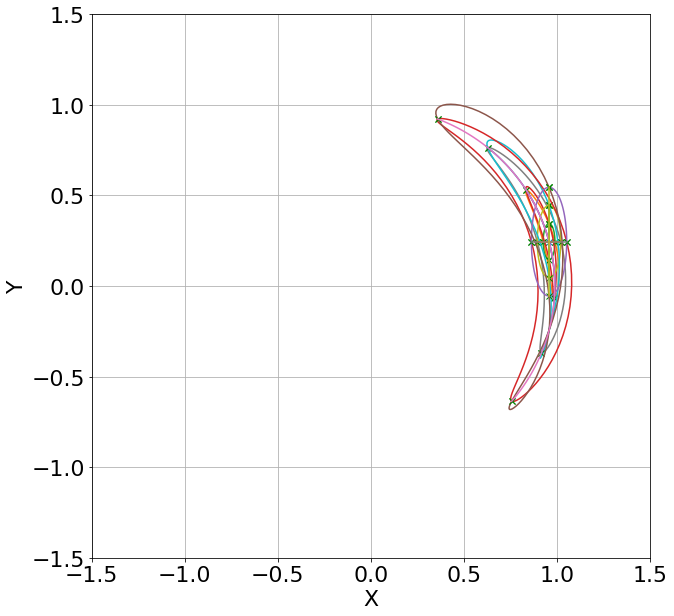

In [78]:
plt.figure(figsize=(10,10))
sigma = np.diag([1e-10,1e-10,0.1,0.001,0.01,1e-10])
# sigma = sklearn.datasets.make_spd_matrix(6)*1e-1


# for i in range(0,10):
#     sigma_visualize(mrob.geometry.SE3([0,0,i*0.05,i*1,0,0]), sigma=sigma,N = 100, K=range(1,2) )
sigma_visualize(mrob.geometry.SE3([0,0,0.5,1,0,0]), sigma=sigma,N = 100, K=[1,2,3] )

plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.grid()
plt.show()
# res = {'xy' : {'cirlce' : points, 'axis1' : points, 'axis2' : points}}